Title: Impacts of Environmental Condition on Woody Plant Growth

Author: Jacqueline Hernandez, Cam Angulo, Will Harrigan

Date: 2022-12-1

Summary: We used Ghannoum et al's allometric data of Eucalyptus saligna and Eucalyptus sideroxylon individuals grown for 80 and 150 days under one of three CO2 concentrations and one of two temperatures. These treatment groups were meant to mimic pre-industrial, current, and future environmental conditions. We used the corresponding paper to guide us in our data wrangling, analysis and data visualization goals. 

Based on Ghannoum, O. et al. "Exposure to Preindustrial, current, and future atmospheric CO2 and temperature differentially affects growth and photosynthesis in Eucalyptus." Global Change Biology, Volume 16, pages 303-319. doi:10.1111/j.1365-2486.2009.02003.x

Raw data sourced from https://github.com/dfalster/baad/tree/master/data/Ghannoum2010b and https://github.com/dfalster/baad/tree/master/data/Ghannoum2010a

# R Packages

In [1]:
#R Packages -- This list includes all of the packages used for data analysis

library(dplyr)
library(tibble)
library(scales)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Tidying and Cleaning Data

In [2]:
#1
#Our data is collected from a GitHub Repository
#Here we read the raw data into a tibble and save the tibbles as Ghannoum_b and Ghannoum_a
#Ghannoum is the author who collected and published this data
#Ghannoum_a data is collected over long timescale (150 days), and a more comprehensive survey of woody plant growth
#Ghannoum_b data is collected over a shorter timescale (80 days)

Ghannoum_b <- tibble(read.csv(url("https://raw.githubusercontent.com/dfalster/baad/master/data/Ghannoum2010b/data.csv")))
Ghannoum_a <- tibble(read.csv(url("https://raw.githubusercontent.com/dfalster/baad/master/data/Ghannoum2010a/data.csv")))

head(Ghannoum_b)
head(Ghannoum_a)

Species,Temp,CO2,Potnum,LA,Height,Basaldia,LeafDW,StemDW,RootDW,LMA,LAR
<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Saligna,Amb,400,55,376,23.3,2.97,1.12,0.44,1.28,29.79,13.25
Saligna,Amb,400,51,682,20.1,3.07,0.89,0.34,0.95,13.05,31.34
Saligna,Amb,400,78,539,28.2,3.11,1.46,0.65,1.21,27.09,16.22
Saligna,Amb,400,77,739,17.6,2.51,0.54,0.20,0.47,7.31,61.03
Saligna,Amb,400,49,582,24.3,3.38,1.61,0.74,1.34,27.66,15.78
Saligna,Amb,400,45,258,16.4,2.57,0.62,0.28,1.01,24.03,13.54


Species,CO2,Temp,Water,Potnum,LeafDW,StemDW,RootDW,RootShoot,LMA,⋯,Basaldia1,Basaldia2,Tipdia1,Tipdia2,Height,Branchnum,Mainstemnum,Primarybranchnum,Secondarybranchnum,Tertiarybranchnum
<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
Saligna,280,Amb,dry,132,15.74,13.10,8.77,0.30,32.48,⋯,8.35,8.29,1.30,1.72,97,61,NA,28,33,0
Saligna,280,Amb,dry,133,17.58,14.16,22.74,0.71,34.22,⋯,8.40,8.42,1.43,1.28,105,59,NA,26,33,0
Saligna,280,Amb,dry,139,18.19,15.30,15.62,0.46,33.35,⋯,9.61,9.59,1.82,3.08,115,37,NA,27,10,0
Saligna,280,Amb,dry,150,14.22,13.83,8.01,0.28,33.01,⋯,7.84,7.80,2.45,2.05,112,53,NA,31,22,0
Saligna,280,Amb,dry,158,22.26,18.42,22.19,0.54,40.22,⋯,9.35,9.21,2.80,1.74,104,76,NA,32,44,0
Saligna,280,Amb,dry,162,18.71,17.50,18.41,0.50,40.90,⋯,10.13,10.60,1.47,1.99,103,60,NA,29,31,0


In [3]:
#2
#We are going to combine Ghannoum_b with Ghannoum_a
#Before we do so we added columns of time-scale to the data so we can compare each treatment and how the timescales relates to data
Ghannoum_b$DAP <- 80 
Ghannoum_a$DAP <- 150


In [4]:
#3 
#We also want to compare total dry-weight between datasets
#Before we combine the data-sets we add a column called TotalDW, which is the sum of all the dry-weight measurements collected

Ghannoum_b$totalDW <- Ghannoum_b$LeafDW + Ghannoum_b$StemDW + Ghannoum_b$RootDW
Ghannoum_a$totalDW <- Ghannoum_a$LeafDW + Ghannoum_a$StemDW + Ghannoum_a$RootDW


In [5]:
#4
#Here we fix a few inconsistently named species rows in Ghannoum_a and b

Ghannoum_b$Species[which(Ghannoum_b$Species=="E. saligna")] <- "Saligna" 
Ghannoum_a$Species[which(Ghannoum_b$Species=="E. saligna")] <- "Saligna"

In [31]:
#5
#Here we create a subset of the species, total DW, DAP (date after planting)

species <- c(Ghannoum_a$Species, Ghannoum_b$Species)
temp <- c(Ghannoum_a$Temp, Ghannoum_b$Temp)
co2 <- c(Ghannoum_a$CO2, Ghannoum_b$CO2)
total_dw <- c(Ghannoum_a$totalDW, Ghannoum_b$totalDW)
dap <- c(Ghannoum_a$DAP, Ghannoum_b$DAP)

ghanAB_dw_dap <- data.frame(species, temp, co2, dap, total_dw)
head(ghanAB_dw_dap)


,species,temp,co2,dap,total_dw
,<chr>,<chr>,<int>,<dbl>,<dbl>
1,Saligna,Amb,280,150,37.61
2,Saligna,Amb,280,150,54.48
3,Saligna,Amb,280,150,49.11
4,Saligna,Amb,280,150,36.06
5,Saligna,Amb,280,150,62.87
6,Saligna,Amb,280,150,54.62


In [32]:
#6
#Here we add height to our total Ghannoum dataframe
height<- c(Ghannoum_a$Height, Ghannoum_b$Height)

ghanAB_total <- (cbind(ghanAB_dw_dap, height))
head(ghanAB_total)


,species,temp,co2,dap,total_dw,height
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,Saligna,Amb,280,150,37.61,97
2,Saligna,Amb,280,150,54.48,105
3,Saligna,Amb,280,150,49.11,115
4,Saligna,Amb,280,150,36.06,112
5,Saligna,Amb,280,150,62.87,104
6,Saligna,Amb,280,150,54.62,103


In [20]:
#7 
#For data analysis we also want to compare the Relative Growth Rate (RGR) and Net Assimilation Rate (NAR)
#Here we create a table with NAs so we can use a function to add the rates to the table

species <- sort(rep(unique(Ghannoum_b$Species), 6))
temp <- unique(Ghannoum_b$Temp) %>% rep(3) %>% sort
CO2 <- unique(Ghannoum_b$CO2) %>% sort %>% rep(4)
rgr <- rep(NA, 12)
nar <- rep(NA, 12)
ghanB_rgr_nar<- data.frame(species, temp, CO2, rgr, nar) 
head(ghanB_rgr_nar)

,species,temp,CO2,rgr,nar
,<chr>,<chr>,<int>,<lgl>,<lgl>
1,Saligna,Amb,280,NA,NA
2,Saligna,Amb,400,NA,NA
3,Saligna,Amb,640,NA,NA
4,Saligna,Elv,280,NA,NA
5,Saligna,Elv,400,NA,NA
6,Saligna,Elv,640,NA,NA


## Relative Growth Rate (RGR) and Net Assimilation Rate (NAR)
To find relative growth rate and net assimilation rate the following equation was used, as quoted from Ghannoum et al 2010:

We first subset the data by the 12 treatment groups, which varied on species (E. saligna versus E. sideroxylon), temperature (ambient versus elevated) and CO2 levels (280, 400, and 640 ppm). Looking at each subset, we paired trees from DAP 80 (T1) and DAP 150 (T2) depending on size. We then calculated RGR and NAR for all 12 subsets per the equations and averaged the results. 

We compared those averages with total treatment averages, meaning we summed all of the dry mass, whole plant leaf area, and times for DAP 80 and DAP 150 and then calculated the equation below. 

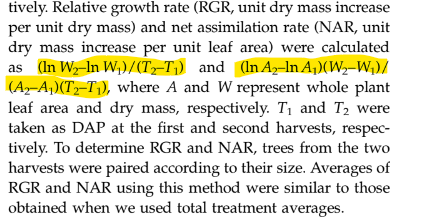

In [21]:
#8
#Here we calculate the average RGR and NAR for Temp, CO2 and Species
rgr_nar <- function(n){
    tmp_DW80 <- subset(Ghannoum_b, Species == ghanB_rgr_nar$species[n] & Temp == ghanB_rgr_nar$temp[n] & CO2== ghanB_rgr_nar$CO2[n], select = totalDW) %>% sum
    tmp_DW150 <- subset(Ghannoum_a, Species == ghanB_rgr_nar$species[n] & Temp == ghanB_rgr_nar$temp[n] & CO2 == ghanB_rgr_nar$CO2[n], select = totalDW) %>% sum
    rgr <- (log(tmp_DW150) - log(tmp_DW80)) / 70
    
    tmp_LA80 <- subset(Ghannoum_b, Species == ghanB_rgr_nar$species[n] & Temp == ghanB_rgr_nar$temp[n] & CO2== ghanB_rgr_nar$CO2[n], select = LA) %>% sum
    tmp_LA150 <- subset(Ghannoum_a, Species == ghanB_rgr_nar$species[n] & Temp == ghanB_rgr_nar$temp[n] & CO2== ghanB_rgr_nar$CO2[n], select = LA) %>% sum
    nar <- ((log(tmp_LA150) - log(tmp_LA80)) * (tmp_DW150 - tmp_DW80)) / ((tmp_LA150 - tmp_LA80)* 70)
    return(c(rgr,nar))}

In [22]:
#9 
#Adding rgr and nar averages into the ghanB_rgr_nar dataframe
tmp <- t(mapply(rgr_nar, 1:12)) 

ghanB_rgr_nar$rgr <- tmp[,1]
ghanB_rgr_nar$nar <- tmp[,2]
head(ghanB_rgr_nar)

,species,temp,CO2,rgr,nar
,<chr>,<chr>,<int>,<dbl>,<dbl>
1,Saligna,Amb,280,0.04532699,0.0004488385
2,Saligna,Amb,400,0.05461554,0.0005232528
3,Saligna,Amb,640,0.04709482,0.0005569811
4,Saligna,Elv,280,0.04539022,0.0003789528
5,Saligna,Elv,400,0.04017024,0.0004397112
6,Saligna,Elv,640,0.03846561,0.0005428327


In [37]:
#10
#We also want to investigate how leaf characteristics differ between species
#Here we create a dataframe consisting of all leaf characteristics between the two datasets
#These metrics act as a good indicator of plant functioning
#LMA = Leaf mass per area
#LAR = Leaf assimilation rate

temp <- c(Ghannoum_a$Temp, Ghannoum_b$Temp)
co2 <- c(Ghannoum_a$CO2, Ghannoum_b$CO2)
species <- c(Ghannoum_a$Species, Ghannoum_b$Species)
leaf_dw <- c(Ghannoum_a$LeafDW, Ghannoum_b$LeafDW)
lma <- c(Ghannoum_a$LMA, Ghannoum_b$LMA)
lar <- c(Ghannoum_a$LAR, Ghannoum_b$LAR)


leaf_data <- data.frame(species, temp, co2, leaf_dw, lma, lar)

head(leaf_data)

,species,temp,co2,leaf_dw,lma,lar
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,Saligna,Amb,280,15.74,32.48,12.7
2,Saligna,Amb,280,17.58,34.22,9.4
3,Saligna,Amb,280,18.19,33.35,11.0
4,Saligna,Amb,280,14.22,33.01,11.8
5,Saligna,Amb,280,22.26,40.22,8.7
6,Saligna,Amb,280,18.71,40.90,8.3


# Data Visualization

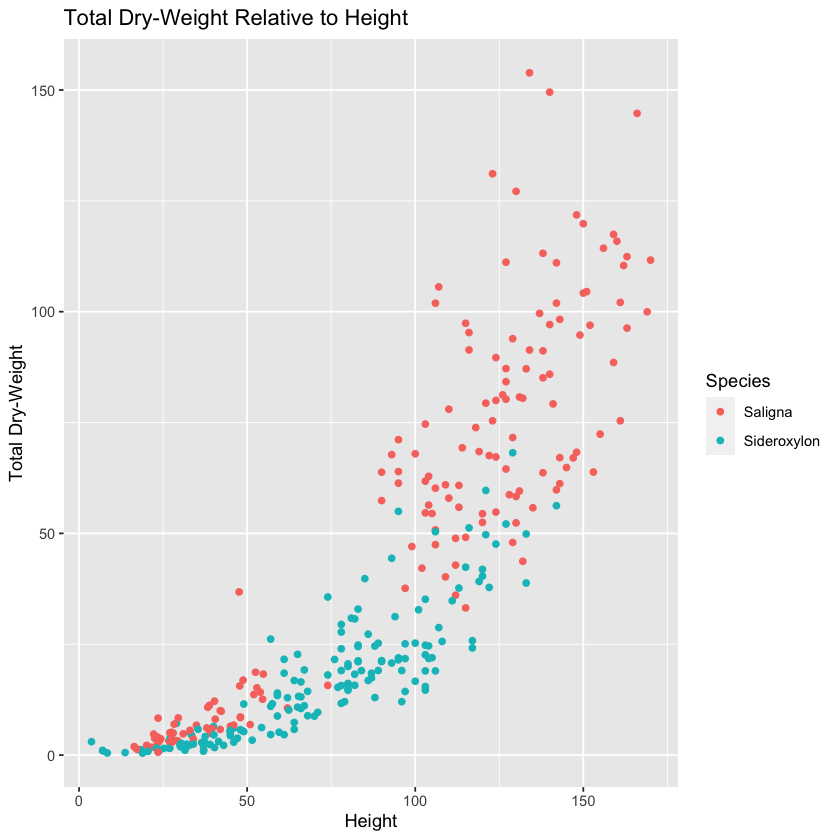

In [57]:
#1
#Scatter plot of Dry-weight relates to Height across Species

p <- ggplot(ghanAB_total, aes(height, total_dw))
p + geom_point(aes(colour = species))+labs(title = 'Total Dry-Weight Relative to Height', x = 'Height', y= 'Total Dry-Weight'
                                          , color = 'Species')

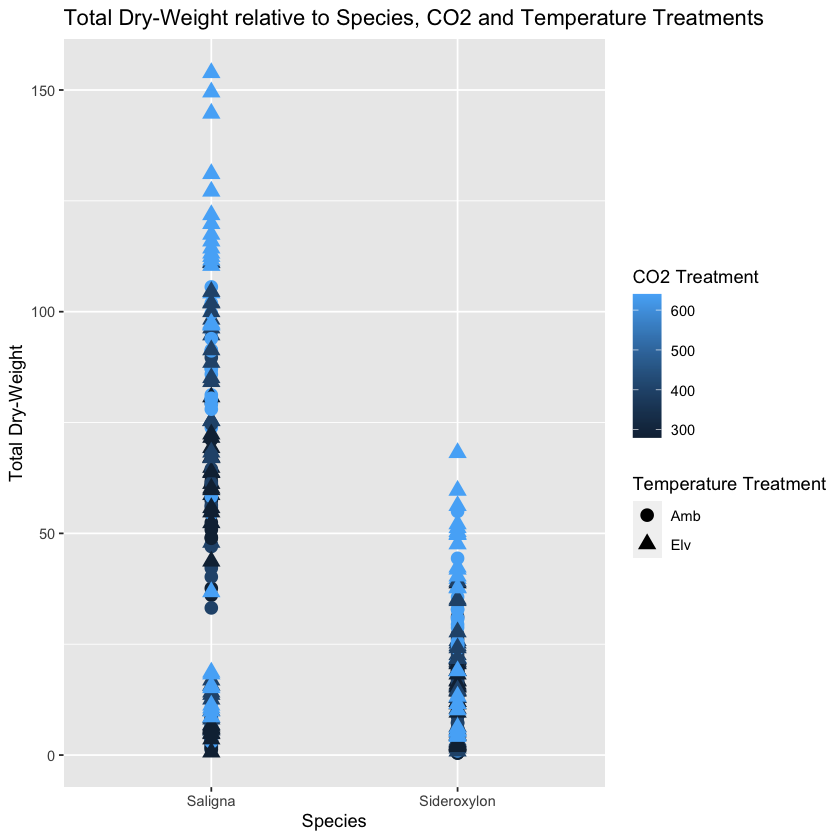

In [63]:
#2
#Plot of Dry-Weight relative to species, CO2 and Temperature Treatments 
p <- ggplot(data = ghanAB_total)
p + geom_point(aes(x=species, y= total_dw, color= co2, shape = temp), size = 3.5)+
labs(title = "Total Dry-Weight relative to Species, CO2 and Temperature Treatments" ,x="Species", y= 'Total Dry-Weight', color = "CO2 Treatment", shape = "Temperature Treatment")

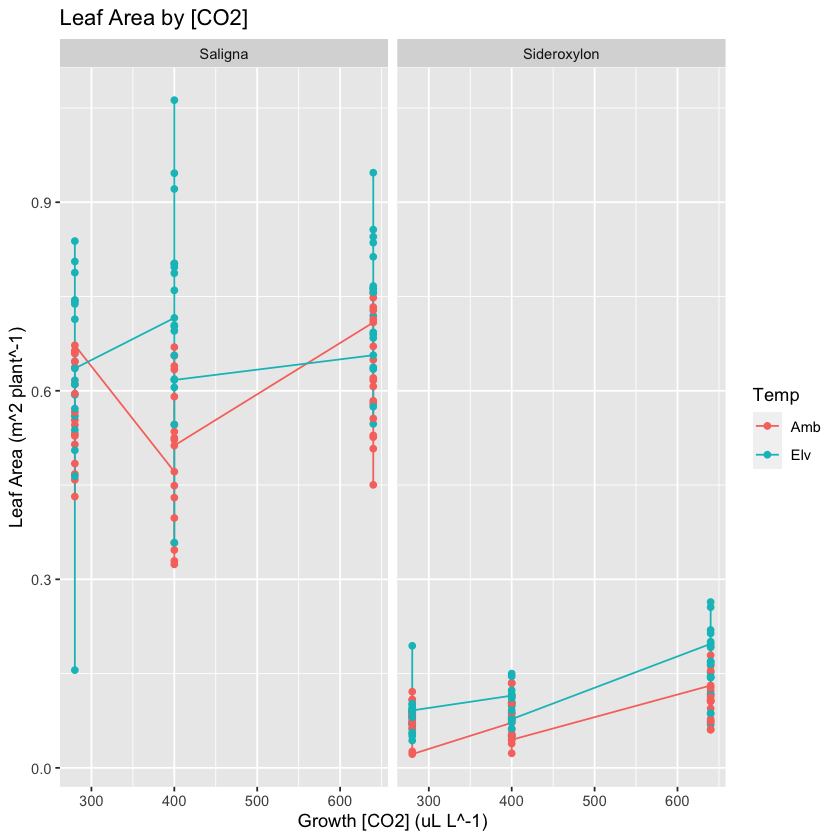

In [71]:
#3
#Plotted leaf area against CO2 color-coded by temp for each species

LAplot <- ggplot(data =Ghannoum_a, aes(x=CO2,y=LA, colour = Temp)) + geom_line(linetype = 1) + geom_point() + facet_wrap(~Species)

LAplot + ggtitle("Leaf Area by [CO2]") +
  xlab("Growth [CO2] (uL L^-1)") + ylab("Leaf Area (m^2 plant^-1)") + scale_y_continuous(labels = label_number(scale = 1e-4))

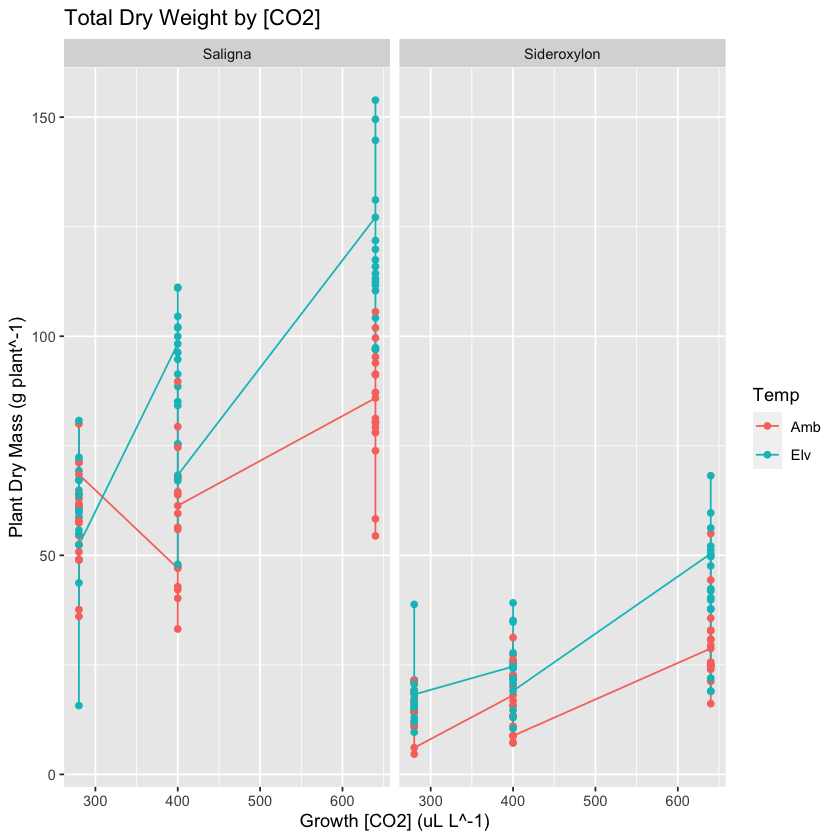

In [70]:
#4
#Plotted total Dry Weight against CO2 color-coded by temp for each species

DWplot <- ggplot(data =Ghannoum_a, aes(x=CO2,y=totalDW, colour = Temp)) + geom_line(linetype = 1) + geom_point() + facet_wrap(~Species)

DWplot + ggtitle("Total Dry Weight by [CO2]") +
  xlab("Growth [CO2] (uL L^-1)") + ylab("Plant Dry Mass (g plant^-1)")

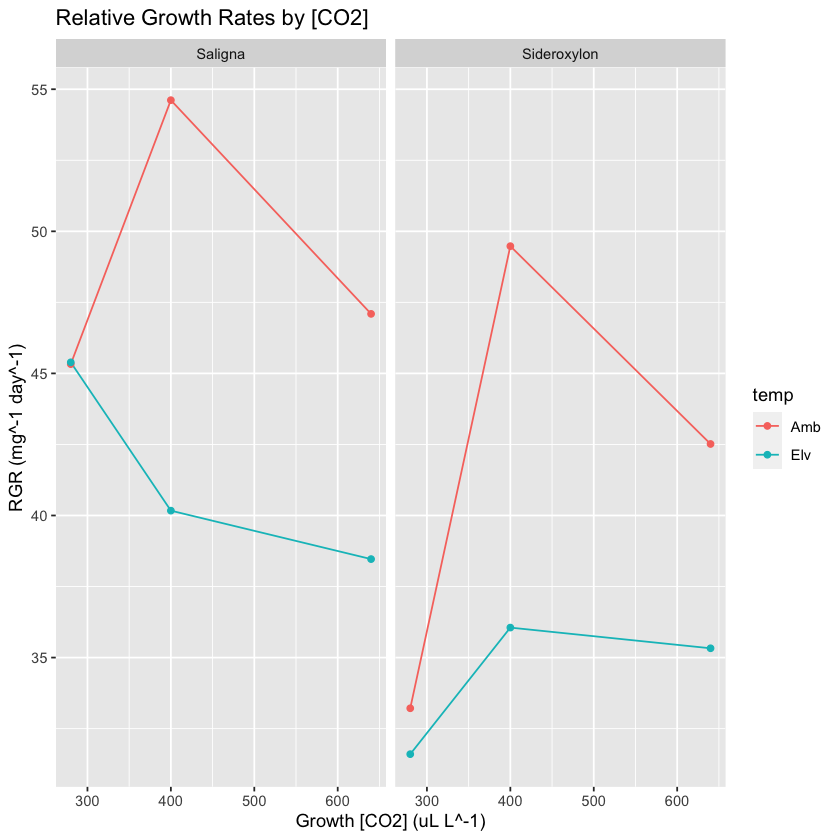

In [68]:
#5
#Plotted RDR against CO2 color-coded by temp for each species

RGRplot <- ggplot(data =ghanB_rgr_nar, aes(x=CO2,y=rgr, colour = temp)) + geom_line(linetype = 1) + geom_point() + facet_wrap(~species)

RGRplot + ggtitle("Relative Growth Rates by [CO2]") +
  xlab("Growth [CO2] (uL L^-1)") + ylab("RGR (mg^-1 day^-1)")+
	scale_y_continuous(labels = label_number(scale = 1000))

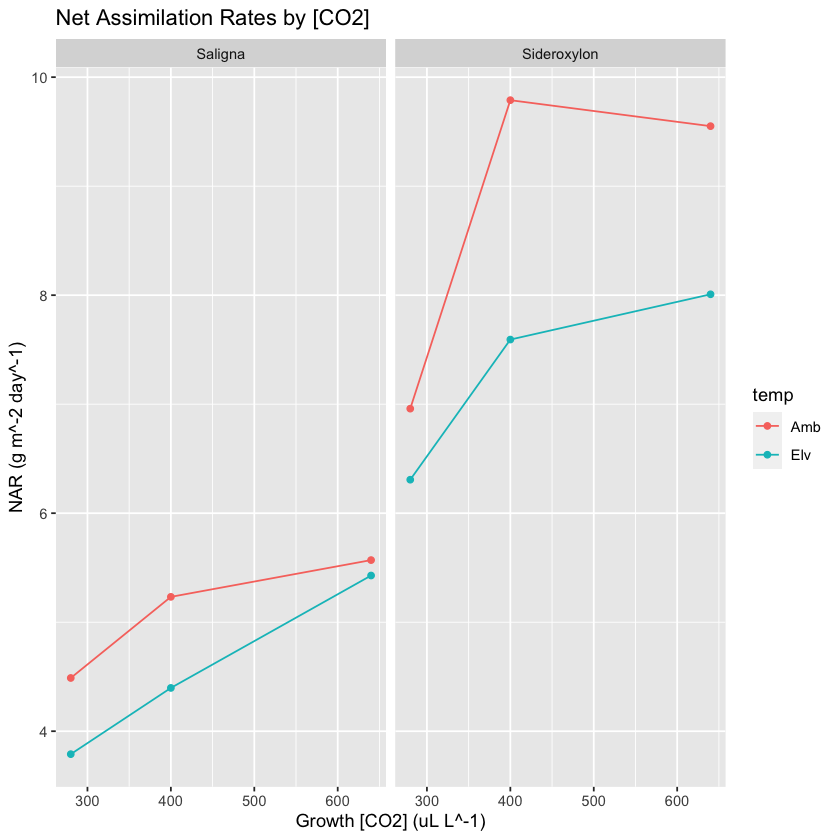

In [69]:
#6
#Plotted NAR against CO2 by temp for each species

NARplot <- ggplot(data =ghanB_rgr_nar, aes(x=CO2,y=nar, colour = temp)) + geom_line(linetype = 1) + geom_point() + facet_wrap(~species)

NARplot + ggtitle("Net Assimilation Rates by [CO2]") +
  xlab("Growth [CO2] (uL L^-1)") + ylab("NAR (g m^-2 day^-1)")+
	scale_y_continuous(labels = label_number(scale = 10000))